In [17]:
import scipy as sp
import os
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import linear_model
import plotly.express as px
import plotly
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score


import japanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 乱数seedの固定
np.random.seed(seed=123)

In [76]:
PATH = "/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/"
FEATS = ["hf", "pop",   "gdp","urb","dist", "air", "detection"]

In [19]:
df = pd.read_csv("../../data/data_covid_fix_name_code_coordinate_ltaly_medianage_hdi_density.csv")
df = df.dropna().reset_index(drop=True)

In [77]:
y=df["date_first"].values

In [78]:
X = df[FEATS]
sscaler = preprocessing.StandardScaler() # インスタンスの作成
sscaler.fit(X)    
X = sscaler.transform(X) # xを変換
pd.DataFrame(X, columns=FEATS)

,hf,pop,gdp,urb,dist,air,detection
0,0.848173,-0.311439,-0.433684,-0.063938,-0.366392,-0.299479,1.168601
1,-1.758643,0.017707,-0.343016,0.497620,0.163625,-0.222283,-1.629438
2,-1.383627,-0.077776,-0.729617,0.173047,0.510445,-0.302324,-1.364456
3,-0.048206,0.036656,-0.123424,1.375357,2.652719,-0.284221,1.195549
4,1.561618,-0.126421,1.206121,1.108126,-0.212692,0.648163,2.201585
...,...,...,...,...,...,...,...
143,-2.847103,-0.093995,-0.230809,1.208304,1.656926,-0.276411,-1.777649
144,-0.569569,0.463501,-0.686996,-1.177019,-1.565053,0.288317,0.409582
145,-2.389767,-0.097101,-0.895623,-1.144037,-0.623394,-0.299062,-1.764175
146,-0.386634,-0.190312,-0.825030,-0.830230,0.308507,-0.303179,-1.184806


In [79]:
# データを早期、晩期に分割
y_early = df["date_first"][df["date_first"]<40]
y_late = df["date_first"][df["date_first"]>40]

x_early = X[df["date_first"]<40]
x_late = X[df["date_first"]>40]

# 早期感染国

In [80]:
model_early = sm.OLS(y_early, sm.add_constant(x_early))
result_early = model_early.fit()
result_early.summary(xname=[" Intercept"] + FEATS) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             date_first   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     2.967
Date:                Wed, 13 Jan 2021   Prob (F-statistic):             0.0365
Time:                        17:30:28   Log-Likelihood:                -60.616
No. Observations:                  23   AIC:                             137.2
Df Residuals:                      15   BIC:                             146.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
 Intercept    36.1802      3.046     11.878      0.000      29.688      42.672
hf             1.0867      2.028      0.536      0.600      -3.235       5.409
pop            0.5718      0.444      1.289      0.217      -0.374       1.517
gdp           -0.6127      1.957     -0.313      0.759      -4.784       3.559
urb           -0.3031      1.953     -0.155      0.879      -4.465       3.859
dist           7.1405      2.039      3.502      0.003       2.795      11.486
air           -1.2628      0.525     -2.405      0.030      -2.382      -0.144
detection     -2.7567      1.631     -1.690      0.112      -6.233       0.719
==============================================================================
Omnibus:                        2.545   Durbin-Watson:                   2.637
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.959
Skew:                          -0.702   Prob(JB):                        0.375
Kurtosis:                       2.734   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
result_early.aic

137.2311992137627

(array([1., 2., 2., 2., 1., 1., 4., 3., 4., 3.]),
 array([19.05576355, 20.44587128, 21.835979  , 23.22608672, 24.61619445,
        26.00630217, 27.39640989, 28.78651761, 30.17662534, 31.56673306,
        32.95684078]),
 <a list of 10 Patch objects>)

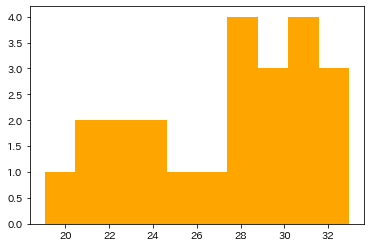

In [29]:
y_hat_early = result_early.predict(sm.add_constant(x_early))
plt.hist(y_hat_early, color="orange")

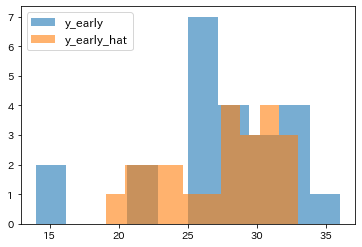

In [115]:
# 推定値の可視化
plt.hist(y_early,  alpha=0.6, label="y_early")
plt.hist(y_hat_early,  alpha=0.6, label="y_early_hat")
plt.legend(loc="upper left", fontsize=12)
plt.savefig("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/y_early_y_early_hat_hist.pdf")

In [38]:
from sklearn.metrics import r2_score
r2_score( y_early, y_hat_early)

0.5806309997799333

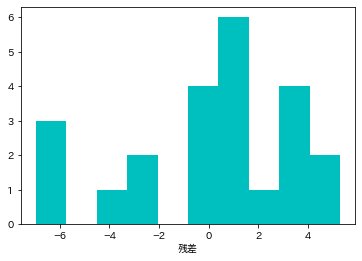

In [114]:
resid_ealry = (y_early - y_hat_early).reset_index(drop=True)
plt.hist(resid_ealry, color="c")
plt.xlabel("残差")

plt.savefig(PATH +"resid_ealry.eps")

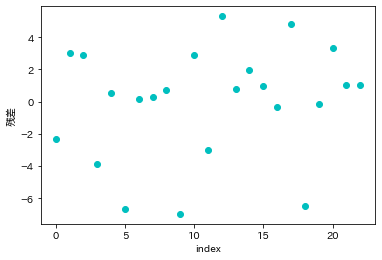

In [113]:
plt.scatter(resid_ealry.index, resid_ealry, color="c")
plt.xlabel("index")
plt.ylabel("残差")

plt.savefig(PATH +"scatter_resid_early.eps")

# 晩期感染国

In [81]:
model_late = sm.OLS(y_late, sm.add_constant(x_late))
result_late = model_late.fit()
result_late.summary(xname=[" Intercept"] + FEATS) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             date_first   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     18.10
Date:                Wed, 13 Jan 2021   Prob (F-statistic):           3.94e-16
Time:                        17:30:35   Log-Likelihood:                -419.42
No. Observations:                 125   AIC:                             854.8
Df Residuals:                     117   BIC:                             877.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
 Intercept    68.5849      0.743     92.354      0.000      67.114      70.056
hf            -0.8516      0.862     -0.988      0.325      -2.559       0.856
pop           -8.3894      2.255     -3.720      0.000     -12.856      -3.923
gdp           -1.7217      1.057     -1.629      0.106      -3.815       0.372
urb           -4.5901      0.902     -5.089      0.000      -6.377      -2.804
dist           1.7753      0.744      2.387      0.019       0.302       3.248
air            4.2952      2.709      1.585      0.116      -1.070       9.661
detection     -2.8492      0.859     -3.317      0.001      -4.550      -1.148
==============================================================================
Omnibus:                        4.808   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                6.223
Skew:                           0.124   Prob(JB):                       0.0445
Kurtosis:                       4.064   Cond. No.                         7.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
result_late.aic

854.835259773472

(array([ 7., 11., 17., 15., 18., 18., 20.,  9.,  8.,  2.]),
 array([55.40734464, 58.57816384, 61.74898304, 64.91980224, 68.09062144,
        71.26144065, 74.43225985, 77.60307905, 80.77389825, 83.94471746,
        87.11553666]),
 <a list of 10 Patch objects>)

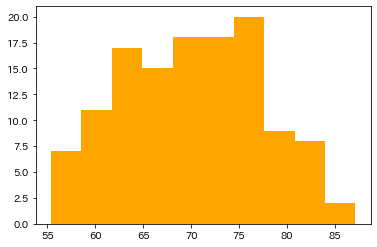

In [57]:
y_hat_late = result_late.predict(sm.add_constant(x_late))
plt.hist(y_hat_late, color="orange")

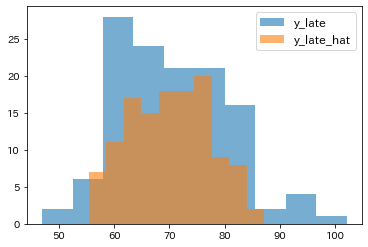

In [112]:
# 推定値の可視化
plt.hist(y_late,  alpha=0.6, label="y_late", bins=10)
plt.hist(y_hat_late,  alpha=0.6, label="y_late_hat", bins=10)
plt.legend(loc="upper right", fontsize=12)
plt.savefig("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/y_late_y_late_hat_hist.pdf")

In [71]:
from sklearn.metrics import r2_score
r2_score( y_late, y_hat_late)

0.51984835803578

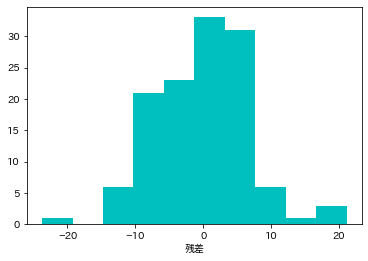

In [111]:
resid_late = (y_late - y_hat_late).reset_index(drop=True)
plt.hist(resid_late, color="c")
plt.xlabel("残差")

plt.savefig(PATH +"resid_late.eps")

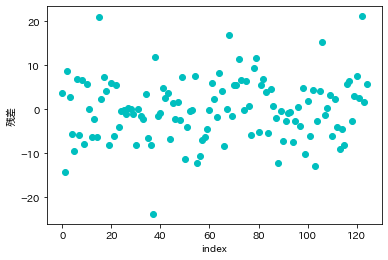

In [110]:
plt.scatter(resid_late.index, resid_late, color="c")
plt.xlabel("index")
plt.ylabel("残差")

plt.savefig(PATH +"scatter_resid_late.eps")